# Evolution of Sample Average

## Generate Random Numbers

In [66]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("../custom.matplotlibrc")

MEAN = 0
B = 1

def laplace(x, mean, b):
    return 1 / (2*b) * np.exp(-np.abs(x - mean) / b)

x = np.linspace(-6, 6, 200)
pdf = laplace(x, MEAN, B)

X = 1_000
T = pow(2, 11)

random_numbers = np.random.laplace(loc=MEAN, scale=B, size=(X, T))


## Make a Histogram for first Experiment

Text(0, 0.5, 'PDF$(x)$')

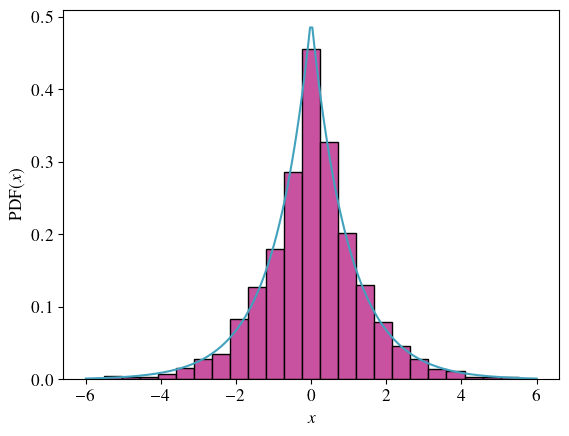

In [67]:
plt.hist(random_numbers[0], bins=25, density=True, range=(-6, 6))
plt.plot(x, pdf)
plt.xlabel("$x$")
plt.ylabel("PDF$(x)$")


## Plot the Average over time

Text(0, 0.5, '$S_t$')

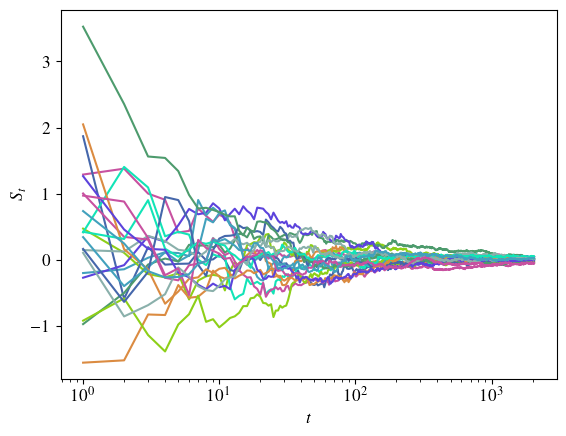

In [69]:
n = np.arange(1, random_numbers[0].__len__() + 1, 1)
for i in range(20):
    time_evolution_average = random_numbers[i].cumsum() / n

    plt.xscale("log")
    plt.plot(n, time_evolution_average)
plt.xlabel("$t$")
plt.ylabel("$S_t$")

## $S_t$ histogram evolution

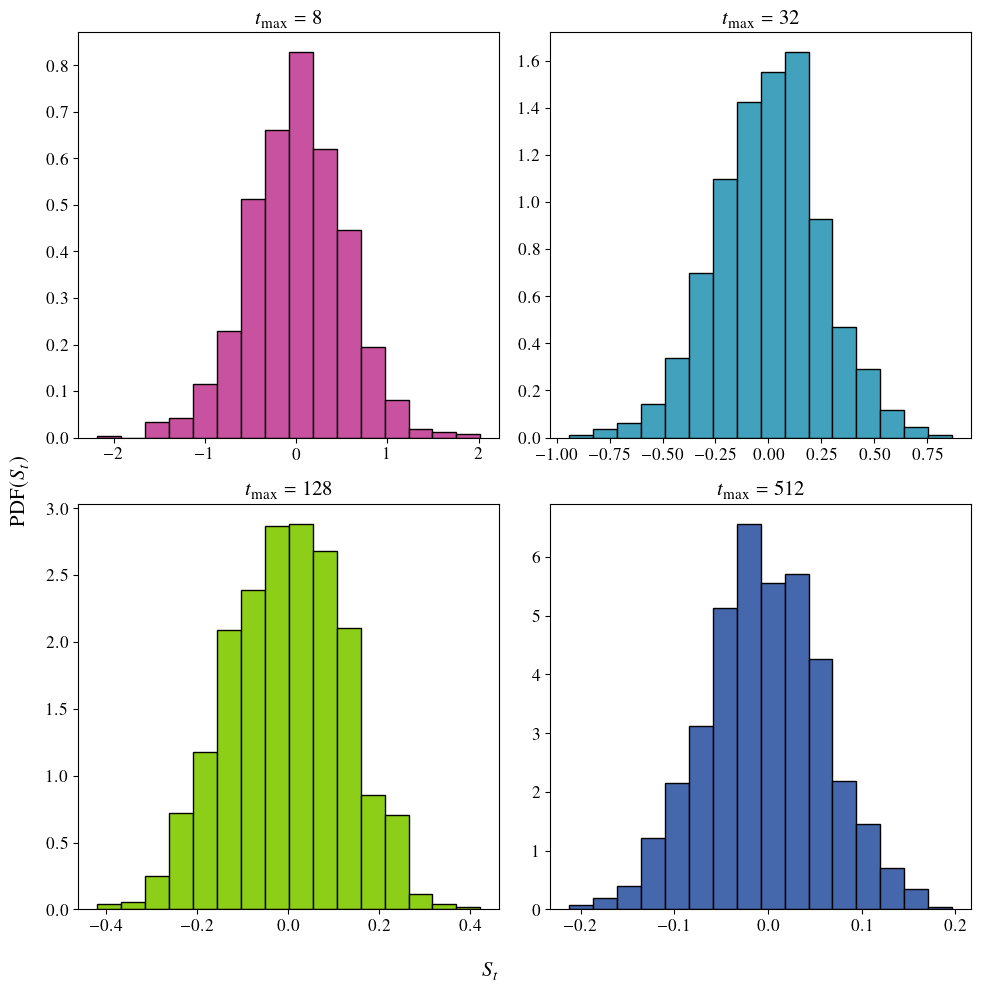

In [107]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
cycle = plt.rcParams["axes.prop_cycle"]
colors = cycle.by_key()["color"]
for index, t, color in zip([(0, 0), (0, 1), (1, 0), (1, 1)], [8, 32, 128, 512], colors[:4]):
    average = random_numbers[:, :t].mean(axis=1)
    ax[index].hist(average, bins=16, density=True, color=color)
    ax[index].set_title(f"$t_\\mathrm{{max}} = {t}$")

fig.supxlabel("$S_t$")
fig.supylabel(r"$\text{PDF}(S_t)$")
fig.tight_layout(rect=[0, 0, 1, 1])

## Estimated Uncertainty

In [108]:
i = 0
uncertainty = np.array([random_numbers[i][1:j].std() for j in range(1,T)])
uncertainty.shape

/home/gabriel/.local/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gabriel/.local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/gabriel/.local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(2048,)